# Titanic Disaster - survival prediction - Kaggle

The sinking of the Titanic is one of the most infamous shipwrecks in history.
On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).
#### https://www.kaggle.com/c/titanic/overview

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
sns.set_style('whitegrid')

In [5]:
traindf = pd.read_csv('titanic_train.csv')

In [6]:
traindf.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


In [7]:
traindf.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
traindf.index

RangeIndex(start=0, stop=891, step=1)

In [9]:
traindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [10]:
traindf.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
traindf[traindf['Fare']>=300]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


In [12]:
#traindf.drop([258,679,737], axis=0, inplace=True)

In [13]:
traindf['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [14]:
traindf['CabinClass']=traindf[traindf['Cabin'].notnull()]['Cabin'].apply(lambda c: c[0])
traindf['CabinClass'] = traindf['CabinClass'].fillna('U')

In [15]:
#traindf.head()
traindf['CabinClass'].value_counts().sort_values(ascending=True)

T      1
G      4
F     13
A     15
E     32
D     33
B     47
C     59
U    687
Name: CabinClass, dtype: int64

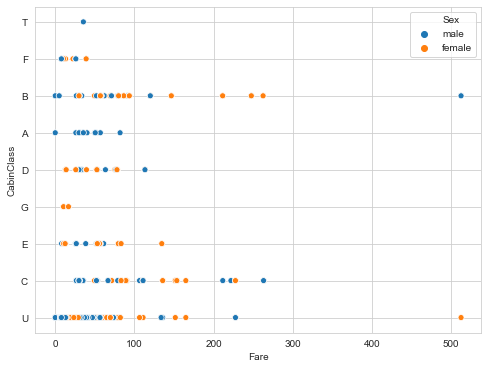

In [16]:
plt.figure(figsize=(8,6))
#sns.countplot(x='CabinClass',data=traindf,hue='Survived')
#sns.countplot(x='CabinClass',data=traindf,hue='Sex')
sns.scatterplot(y='CabinClass', x='Fare', data=traindf,hue='Sex')
#sns.distplot(traindf['Fare'], kde=False,bins=50)

In [17]:
def fillFarePerPass(cols):
    fare = cols[0].astype(float)
    relatives = cols[1].astype(int)
    if (relatives == 0):
        return fare
    else:
        return (fare/(relatives+1))

In [18]:
traindf['Relatives'] = traindf['SibSp'] + traindf['Parch']

In [19]:
traindf['FarePerPass'] = traindf[['Fare','Relatives']].apply(fillFarePerPass,axis=1) #fill age
traindf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,CabinClass,Relatives,FarePerPass
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,U,1,3.62500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C,1,35.64165
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,U,0,7.92500
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C,1,26.55000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,U,0,8.05000


In [20]:
traindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
CabinClass     891 non-null object
Relatives      891 non-null int64
FarePerPass    891 non-null float64
dtypes: float64(3), int64(6), object(6)
memory usage: 104.5+ KB


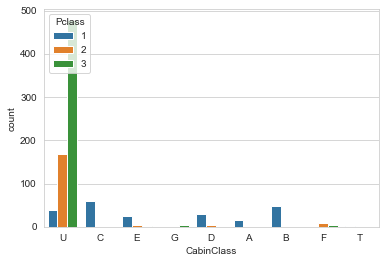

In [21]:
sns.countplot(x='CabinClass',data=traindf,hue='Pclass')

<Figure size 576x432 with 0 Axes>

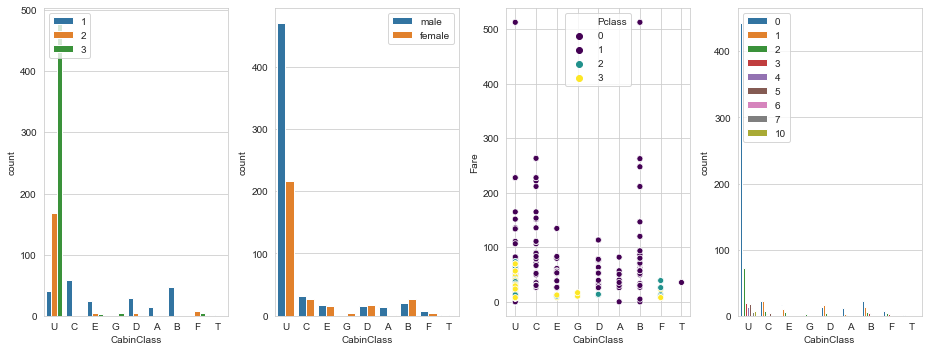

In [22]:
plt.figure(figsize=(8,6))
fig, axes = plt.subplots(nrows=1, ncols=4,figsize=(13, 5))
ax1 = sns.countplot(x='CabinClass',data=traindf,hue='Pclass', ax=axes[0])
ax1.legend()
ax2 = sns.countplot(x='CabinClass',data=traindf,hue='Sex', ax=axes[1])
ax2.legend()
ax3 = sns.scatterplot(x='CabinClass', y='Fare', data=traindf, ax=axes[2], hue='Pclass',palette='viridis')
ax3.legend()
ax4 = sns.countplot(x='CabinClass',data=traindf,hue='Relatives', ax=axes[3])
ax4.legend()
plt.tight_layout()

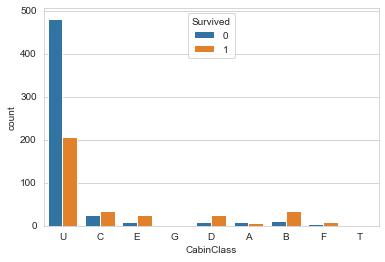

In [23]:
sns.countplot(x='CabinClass',data=traindf,hue='Survived')

In [24]:
traindf.groupby(['CabinClass']).mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Relatives,FarePerPass
CabinClass,,,,,,,,,
A,439.600000,0.466667,1.000000,44.833333,0.133333,0.133333,39.623887,0.266667,32.768100
B,521.808511,0.744681,1.000000,34.955556,0.361702,0.574468,113.505764,0.936170,69.379566
C,406.440678,0.593220,1.000000,36.086667,0.644068,0.474576,100.151341,1.118644,52.273987
D,475.939394,0.757576,1.121212,39.032258,0.424242,0.303030,57.244576,0.727273,34.384263
E,502.437500,0.750000,1.312500,38.116667,0.312500,0.312500,46.026694,0.625000,29.177041
F,370.384615,0.615385,2.384615,19.954545,0.538462,0.538462,18.696792,1.076923,9.050213
G,216.000000,0.500000,3.000000,14.750000,0.500000,1.250000,13.581250,1.750000,4.963021
T,340.000000,0.000000,1.000000,45.000000,0.000000,0.000000,35.500000,0.000000,35.500000
U,443.208151,0.299854,2.639010,27.555293,0.547307,0.365357,19.157325,0.912664,12.616613


In [25]:
traindf.groupby(['CabinClass']).describe()['FarePerPass']

,count,mean,std,min,25%,50%,75%,max
CabinClass,,,,,,,,
A,15.0,32.768100,13.106885,0.000000,27.875350,31.000000,37.812500,52.000000
B,47.0,69.379566,83.283106,0.000000,28.744800,33.500000,83.250000,512.329200
C,59.0,52.273987,42.844108,14.850000,30.000000,37.887500,50.752100,227.525000
D,33.0,34.384263,17.897014,8.761100,25.929200,32.320800,38.979150,77.958300
E,32.0,29.177041,22.408868,6.237500,26.112500,26.550000,27.778137,134.500000
F,13.0,9.050213,1.616310,7.452767,7.650000,8.666667,9.750000,13.000000
G,4.0,4.963021,0.996307,3.487500,4.795313,5.398958,5.566667,5.566667
T,1.0,35.500000,NaN,35.500000,35.500000,35.500000,35.500000,35.500000
U,687.0,12.616613,25.932607,0.000000,7.225000,7.895800,10.500000,512.329200


In [26]:
#traindf[(traindf['FarePerPass']>=68)]['CabinClass'].value_counts()
#traindf[(traindf['FarePerPass']>=40) & (traindf['FarePerPass']<60)]['CabinClass'].value_counts()#C
#traindf[(traindf['FarePerPass']>=68)]['CabinClass'].value_counts()#B
#traindf[(traindf['FarePerPass']>=37) & (traindf['FarePerPass']<40)]['CabinClass'].value_counts()#D
#traindf[(traindf['FarePerPass']>=30) & (traindf['FarePerPass']<34)]['CabinClass'].value_counts()#D
#traindf[(traindf['FarePerPass']>=11) & (traindf['FarePerPass']<30)]['CabinClass'].value_counts()#E
#traindf[(traindf['FarePerPass']>=3) & (traindf['FarePerPass']<6)]['CabinClass'].value_counts()#G
#traindf[(traindf['FarePerPass']>=6) & (traindf['FarePerPass']<11)]['CabinClass'].value_counts()#F

In [27]:
def fillCabinClass1 (cols):
    cabinclass = cols[0]
    pclass = cols[1]
    fare = cols[2]
    
    if(cabinclass != 'U'):
        return cabinclass
    else:
        if (pclass==1):
            if (fare >=65):
                return 'B'
            elif (fare >=40 and fare<65):
                return 'C'
            elif (fare >=35 and fare<40):
                return 'D'
            elif (fare >=33 and fare<35):
                return 'E'
            elif (fare >=30 and fare<33):
                return 'A'
            else:
                return 'C'
        elif (pclass==2):
            if (fare<=10):
                return 'F'
            elif (fare<13):
                return 'E'
            else:
                return 'D'
        else:
            if (fare <=5):
                return 'G'
            elif (fare <7):
                return 'E'
            else:
                return 'F'

In [28]:
#[(-0.001, 7.75] < (7.75, 7.91] < (7.91, 9.841] < (9.841, 14.454] < (14.454, 24.479] < (24.479, 31.0] 
#< (31.0, 69.488] < (69.488, 512.329]]
def fillCabinClass (cols):
    cabinclass = cols[0]
    pclass = cols[1]
    fare = cols[2]
    
    if(cabinclass != 'U'):
        return cabinclass
    else:
        if (fare >69.49):
            return 'B'
        elif (fare >=31 and fare<=69.49):
                return 'C'
        elif (fare >24.48 and fare<=31):
                return 'D'
        elif (fare >14.54 and fare<=24.48):
                return 'E'
        elif (fare >9.8 and fare<=14.54):
                return 'A'
        elif (fare>7.9 and fare<=9.84):
                return 'G'
        else :
                return 'F'

In [29]:
#traindf['CabinClass'] = traindf['CabinClass'].fillna('U')
#traindf['CabinClass'] = traindf[['CabinClass','Pclass','Fare']].apply(fillCabinClass,axis=1) #fill age

In [30]:
traindf['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

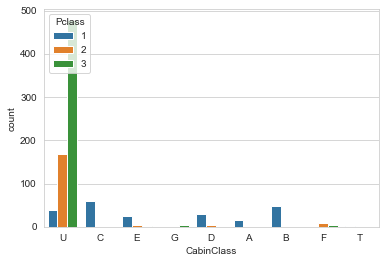

In [31]:
sns.countplot(x='CabinClass',data=traindf,hue='Pclass')

In [32]:
traindf['CabinClass'].value_counts()

U    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: CabinClass, dtype: int64

In [33]:
def mapCabinClass(cols):
    if(cols[0] == 'A'):
        return 1
    elif(cols[0] == 'B'):
        return 2
    elif(cols[0] == 'C'):
        return 3
    elif(cols[0] == 'D'):
        return 4
    elif(cols[0] == 'E'):
        return 5
    elif(cols[0] == 'F'):
        return 6
    elif(cols[0] == 'G'):
        return 7
    elif(cols[0] == 'T'):
        return 8
    else:
        return 0    

In [34]:
traindf['CabinClass'] = traindf[['CabinClass']].apply(mapCabinClass,axis=1) #fill age

In [35]:
traindf['CabinClass'].value_counts()

0    687
3     59
2     47
4     33
5     32
1     15
6     13
7      4
8      1
Name: CabinClass, dtype: int64

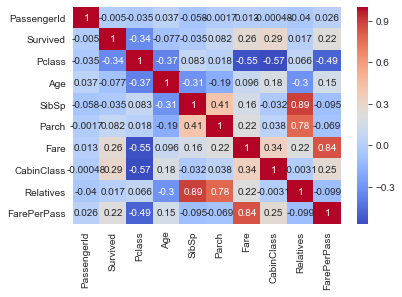

In [36]:
sns.heatmap(traindf.corr(), annot=True, cmap='coolwarm')

In [37]:
#let us see corr for survival column
traindf.corr()['Survived'].sort_values(ascending=True)
#survival is +ve correlated with parch and fare.

Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
PassengerId   -0.005007
Relatives      0.016639
Parch          0.081629
FarePerPass    0.221600
Fare           0.257307
CabinClass     0.287944
Survived       1.000000
Name: Survived, dtype: float64

In [38]:
#let us see missing values
#traindf[traindf['Age'].isnull()]
#177 missing age data out of 891
#traindf[traindf['Cabin'].isnull()]
#687 missing cabin data out of 891

In [39]:
#sns.pairplot(data=traindf)

<Figure size 720x432 with 0 Axes>

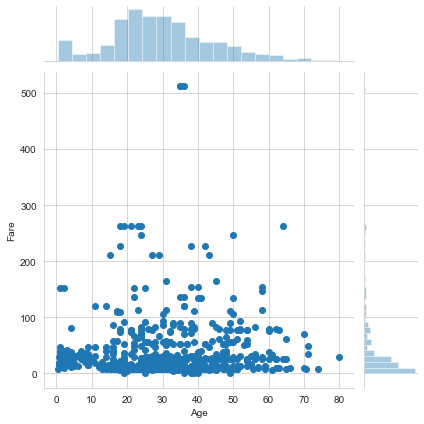

In [40]:
#we have to fill age 177 out of 891 age data ; age is correlated with fare, survived, parch, sibsp
#fig, ax =plt.subplots(1,2)
plt.figure(figsize=(10,6))
sns.jointplot(x='Age',y='Fare',data=traindf)
#Most travellers have fare < 100 while few fare >100 and fare<275. Some outliers at fare > 500
plt.tight_layout()

In [41]:
#714 have age data out of 891. 177 missing
traindf[(traindf['Fare']<100) & (traindf['Age'].notnull())].count() #666 travellers with fare <100 
#traindf[(traindf['Fare']>=100) & (traindf['Age'].notnull())].count() #only 48 travellers with fare >100 
#traindf[(traindf['Fare']>=500) & (traindf['Age'].notnull())].count() #only 48 travellers with fare >500 
#traindf['Age'].notnull()

PassengerId    666
Survived       666
Pclass         666
Name           666
Sex            666
Age            666
SibSp          666
Parch          666
Ticket         666
Fare           666
Cabin          144
Embarked       664
CabinClass     666
Relatives      666
FarePerPass    666
dtype: int64

In [42]:
#traindf[(traindf['Fare']<100) & (traindf['Age'].notnull())].describe() #666 travellers with fare<100. mean age=29.536411
#traindf[(traindf['Fare']>=100) & (traindf['Age'].notnull())].describe() #only 48 travellers with fare>100. mean age=31.956667 
traindf[(traindf['Fare']>=500) & (traindf['Age'].notnull())].describe() #only 48 travellers with fare>500. mean age=35.333333

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,CabinClass,Relatives,FarePerPass
count,3.000000,3.0,3.0,3.000000,3.0,3.000000,3.0000,3.000000,3.000000,3.000000
mean,559.000000,1.0,1.0,35.333333,0.0,0.333333,512.3292,1.333333,0.333333,426.941000
std,261.421116,0.0,0.0,0.577350,0.0,0.577350,0.0000,1.154701,0.577350,147.896701
min,259.000000,1.0,1.0,35.000000,0.0,0.000000,512.3292,0.000000,0.000000,256.164600
25%,469.500000,1.0,1.0,35.000000,0.0,0.000000,512.3292,1.000000,0.000000,384.246900
50%,680.000000,1.0,1.0,35.000000,0.0,0.000000,512.3292,2.000000,0.000000,512.329200
75%,709.000000,1.0,1.0,35.500000,0.0,0.500000,512.3292,2.000000,0.500000,512.329200
max,738.000000,1.0,1.0,36.000000,0.0,1.000000,512.3292,2.000000,1.000000,512.329200


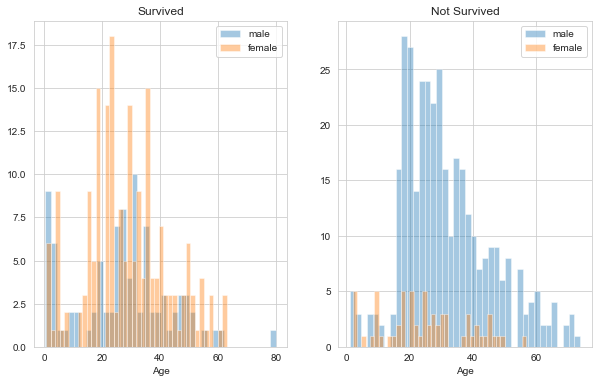

In [43]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 6))
ax1 = sns.distplot(a=traindf[(traindf['Survived']==1) & (traindf['Age'].notnull()) & (traindf['Sex']=='male')]['Age'], bins=40, kde=False, ax=axes[0],label='male')
ax1 = sns.distplot(a=traindf[(traindf['Survived']==1) & (traindf['Age'].notnull()) & (traindf['Sex']=='female')]['Age'], bins=40, kde=False, ax=axes[0],label='female')
ax1.set_title('Survived')
ax1.legend()
ax2 = sns.distplot(a=traindf[(traindf['Survived']==0) & (traindf['Age'].notnull()) & (traindf['Sex']=='male')]['Age'], bins=40, kde=False, ax=axes[1],label='male')
ax2 = sns.distplot(a=traindf[(traindf['Survived']==0) & (traindf['Age'].notnull()) & (traindf['Sex']=='female')]['Age'], bins=40, kde=False, ax=axes[1],label='female')
ax2.set_title('Not Survived')
ax2.legend()
#this clearly shows female has higher chances of survival than male.

In [44]:
#traindf[(traindf['Survived']==1) & (traindf['Age'].notnull()) & (traindf['Sex']=='male')].describe()
#mean survived male age is 27.276022
traindf[(traindf['Survived']==1) & (traindf['Age'].notnull()) & (traindf['Sex']=='female')].describe()
#mean survived female age is 28.847716
traindf[(traindf['Survived']==0) & (traindf['Age'].notnull()) & (traindf['Sex']=='male')].describe()
#mean non-survived male age is 31.618056
#traindf[(traindf['Survived']==0) & (traindf['Age'].notnull()) & (traindf['Sex']=='female')].describe()
#mean non-survived female age is 25.046875

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,CabinClass,Relatives,FarePerPass
count,360.000000,360.0,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000
mean,445.516667,0.0,2.427778,31.618056,0.447222,0.238889,22.999871,0.500000,0.686111,14.479207
std,264.012091,0.0,0.765048,14.056019,0.983141,0.640890,32.423259,1.326818,1.421611,15.749090
min,1.000000,0.0,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,203.750000,0.0,2.000000,21.750000,0.000000,0.000000,7.895800,0.000000,0.000000,7.495800
50%,441.000000,0.0,3.000000,29.000000,0.000000,0.000000,10.500000,0.000000,0.000000,8.050000
75%,686.250000,0.0,3.000000,39.250000,1.000000,0.000000,26.325000,0.000000,1.000000,13.000000
max,891.000000,0.0,3.000000,74.000000,5.000000,5.000000,263.000000,8.000000,7.000000,135.633300


In [45]:
#sns.boxplot(x='Pclass',y='Age',data=traindf)
traindf.groupby('Pclass').mean()

,PassengerId,Survived,Age,SibSp,Parch,Fare,CabinClass,Relatives,FarePerPass
Pclass,,,,,,,,,
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687,2.476852,0.773148,52.936943
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183,0.456522,0.782609,12.698832
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550,0.148676,1.008147,8.094756


In [46]:
#traindf[(traindf['Fare']<100) & (traindf['Age'].notnull())].groupby(['Pclass','Sex']).mean() #666 travellers with fare<100. mean age=29.536411
#traindf[(traindf['Fare']>=100) & (traindf['Fare']<500) & (traindf['Age'].notnull())].groupby(['Pclass','Sex']).mean() #only 48 travellers with fare>100. mean age=31.956667 
traindf[(traindf['Fare']>=500) & (traindf['Age'].notnull())].groupby(['Pclass','Sex']).mean() #only 48 travellers with fare>500. mean age=35.333333

PassengerId  Survived   Age  SibSp  Parch      Fare  \
Pclass Sex                                                           
1      female        259.0       1.0  35.0    0.0    0.0  512.3292   
       male          709.0       1.0  35.5    0.0    0.5  512.3292   

               CabinClass  Relatives  FarePerPass  
Pclass Sex                                         
1      female         0.0        0.0     512.3292  
       male           2.0        0.5     384.2469

In [47]:
#cabin info
traindf.head()
#lets fill cabin as 1 or 0 is value availale or not

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,CabinClass,Relatives,FarePerPass
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1,3.62500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3,1,35.64165
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,7.92500
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3,1,26.55000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0,8.05000


In [48]:
#sns.heatmap(traindf[['Cabin','Fare']].corr(),cmap='summer',annot=True)

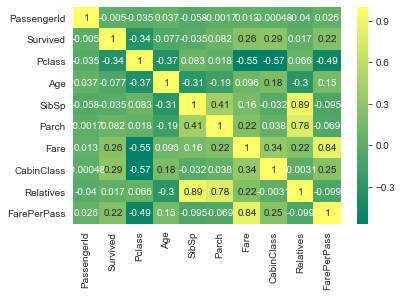

In [49]:
#plt.figure(figsize=(10,6))
sns.heatmap(traindf.corr(),cmap='summer',annot=True)

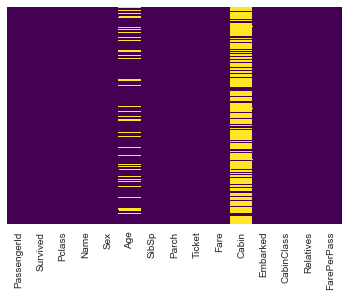

In [50]:
sns.heatmap(traindf.isnull(), yticklabels=False, cbar=False, cmap='viridis') # check here for empty values

In [51]:
traindf['Age'].isnull().value_counts() #177 missing age entries

False    714
True     177
Name: Age, dtype: int64

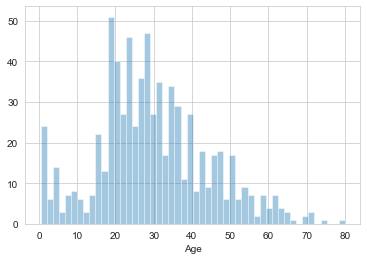

In [52]:
sns.distplot(traindf['Age'].dropna(),kde=False,bins=50) #mostly passengers were of age between 19 and 36

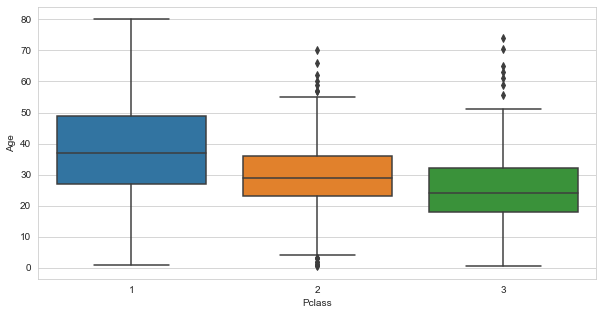

In [53]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Pclass',y='Age',data=traindf) #this will describe same as group by on Pclass

In [54]:
traindf.groupby('Pclass').mean()

,PassengerId,Survived,Age,SibSp,Parch,Fare,CabinClass,Relatives,FarePerPass
Pclass,,,,,,,,,
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687,2.476852,0.773148,52.936943
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183,0.456522,0.782609,12.698832
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550,0.148676,1.008147,8.094756


In [55]:
def fillAge(cols):
    age = cols[0]
    pclass = cols[1]
    fare = cols[2]
    sex = str(cols[3])
    
    if np.isnan(age):
        if fare<100:
            if pclass == 1:
                if sex=='male':
                    return 43.03
                else:
                    return 36.35
                
            elif pclass == 2:
                if sex=='male':
                    return 30.74
                else:
                    return 28.72
                
            else:
                if sex=='male':
                    return 26.51
                else:
                    return 21.75
                
        elif fare>=100 and fare<500:
            if pclass == 1:
                if sex=='male':
                    return 32.26
                else:
                    return 31.47
                
            elif pclass == 2:
                return 29.88
                
            else:
                return 25.14
                
        else:
            if pclass == 1:
                if sex=='male':
                    return 35.5
                else:
                    return 35
                
            elif pclass == 2:
                return 29.88
                
            else:
                return 25.14
        
    else:
        return age

In [56]:
traindf['Age'] = traindf[['Age','Pclass','Fare','Sex']].apply(fillAge,axis=1) #fill age

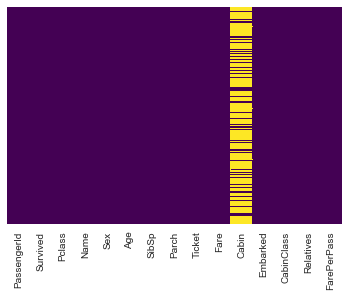

In [57]:
sns.heatmap(traindf.isnull(), yticklabels=False, cbar=False, cmap='viridis')

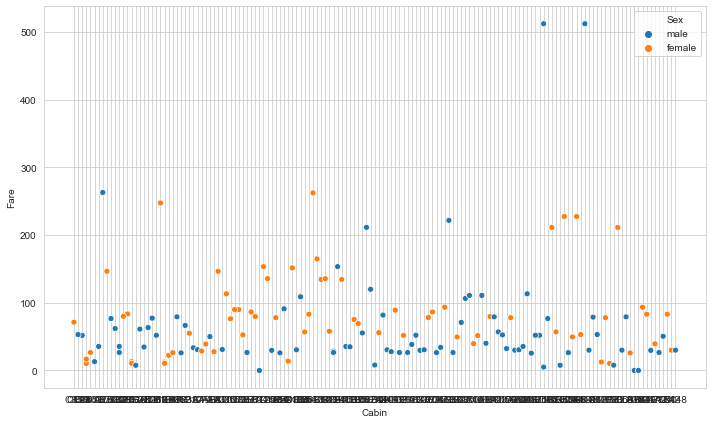

In [58]:
#see cabin correlation
plt.figure(figsize=(10,6))
sns.scatterplot(x='Cabin',y='Fare',data=traindf,hue='Sex')
#traindf[traindf['Cabin'].notnull()][['Fare','Cabin']].sort_values(by='Fare', ascending=False)
#traindf[traindf['Cabin'].notnull()].corr()
#sns.scatterplot(x='Cabin',y='Fare',data=traindf,hue='Survived')
#sns.scatterplot(x='Cabin',y='Fare',data=traindf,hue='SibSp',palette='coolwarm')
#sns.scatterplot(x='Cabin',y='Fare',data=traindf,hue='Parch',palette='coolwarm')
plt.tight_layout()

#traindf[traindf['Cabin'].notnull()]['Cabin'].count() #total 204 cabin out of 891
#traindf[(traindf['Cabin'].notnull()) & (traindf['Sex']=='male')].count()['Cabin']#107 cabin for male
#traindf[(traindf['Cabin'].notnull()) & (traindf['Sex']=='female')].count()['Cabin']#97 cabin for male

#traindf[(traindf['Cabin'].notnull()) & (traindf['Sex']=='male') & (traindf['Fare']<100)].count()['Cabin']
#91 cabin for male with fare<100
#traindf[(traindf['Cabin'].notnull()) & (traindf['Sex']=='male') & (traindf['Fare']>=100)].count()['Cabin']
#14 cabin for male with fare>=100 and fare<500
#traindf[(traindf['Cabin'].notnull()) & (traindf['Sex']=='male') & (traindf['Fare']>=500)].count()['Cabin']
#2 cabin for male with fare>=500

#traindf[(traindf['Cabin'].notnull()) & (traindf['Sex']=='female') & (traindf['Fare']<100)].count()['Cabin']
#70 cabin for male with fare<100
#traindf[(traindf['Cabin'].notnull()) & (traindf['Sex']=='female') & (traindf['Fare']>=100)].count()['Cabin']
#27 cabin for male with fare>=100 and fare<500
#traindf[(traindf['Cabin'].notnull()) & (traindf['Sex']=='female') & (traindf['Fare']>=500)].count()['Cabin']
#0 cabin for male with fare>=500

In [59]:
#traindf.head()

In [60]:
def fillCabin(cols):
    cabin = cols[0]
    fare = cols[1]
    #survived = cols[2]
    if(pd.isnull(cabin)):
        if fare < 100:
            return 1
        else:
            return 0
    else:
        return 1

In [61]:
#traindf['Cabin'] = traindf['Cabin'].isna() #This is assigning True/False
traindf['Cabin'] = traindf[['Cabin','Fare']].apply(fillCabin, axis=1)
traindf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,CabinClass,Relatives,FarePerPass
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,1,S,0,1,3.62500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,1,C,3,1,35.64165
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,1,S,0,0,7.92500
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,1,S,3,1,26.55000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,1,S,0,0,8.05000


In [62]:
def fillNameTitle(cols):
    #salutationList = ['Miss.','Master.','Lady.','Mrs.','Ms.']
    #salutationList = ['Capt.','Col.','Don.','Dr.','Jonkheer.','Lady.','Major.','Master.','Miss.','Mlle.','Mme.','Mrs.','Ms.','Rev.','Sir.']
    #'Capt.','Col.','Don.','Dr.','Jonkheer.','Lady.','Major.','Master.','Miss.','Mlle.','Mme.','Mrs.','Ms.','Rev.','Sir.','the'
    name = cols[0]
    salutation = name.split(',')[1].strip().split(' ')[0]
    #mrTitleList = []
    return salutation

In [63]:
traindf['Name'] = traindf[['Name']].apply(fillNameTitle, axis=1)
traindf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,CabinClass,Relatives,FarePerPass
0,1,0,3,Mr.,male,22.0,1,0,A/5 21171,7.2500,1,S,0,1,3.62500
1,2,1,1,Mrs.,female,38.0,1,0,PC 17599,71.2833,1,C,3,1,35.64165
2,3,1,3,Miss.,female,26.0,0,0,STON/O2. 3101282,7.9250,1,S,0,0,7.92500
3,4,1,1,Mrs.,female,35.0,1,0,113803,53.1000,1,S,3,1,26.55000
4,5,0,3,Mr.,male,35.0,0,0,373450,8.0500,1,S,0,0,8.05000


In [64]:
traindf.groupby('Name').describe()['Fare']

,count,mean,std,min,25%,50%,75%,max
Name,,,,,,,,
Capt.,1.0,71.000000,NaN,71.0000,71.00000,71.00000,71.000000,71.0000
Col.,2.0,31.025000,6.328606,26.5500,28.78750,31.02500,33.262500,35.5000
Don.,1.0,27.720800,NaN,27.7208,27.72080,27.72080,27.720800,27.7208
Dr.,7.0,49.168457,45.673745,10.5000,19.96460,30.50000,64.800000,133.6500
Jonkheer.,1.0,0.000000,NaN,0.0000,0.00000,0.00000,0.000000,0.0000
Lady.,1.0,39.600000,NaN,39.6000,39.60000,39.60000,39.600000,39.6000
Major.,2.0,28.525000,2.793072,26.5500,27.53750,28.52500,29.512500,30.5000
Master.,40.0,34.703125,28.051752,8.5167,18.75000,29.06250,39.171875,151.5500
Miss.,182.0,43.797873,66.027199,6.7500,7.95105,15.62085,41.034400,512.3292


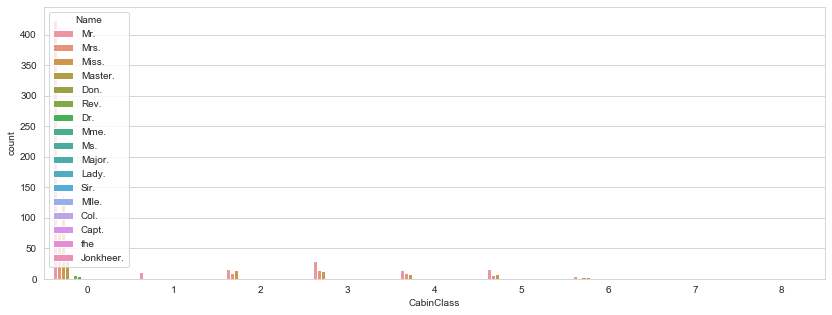

In [65]:
plt.figure(figsize=(14,5))
sns.countplot(x='CabinClass',data=traindf,hue='Name')
#traindf[traindf['Survived']==1].groupby(['Name']).count().sort_values(by='PassengerId', ascending=False)
#traindf[traindf['Survived']==0].groupby(['Name']).count().sort_values(by='PassengerId', ascending=False)

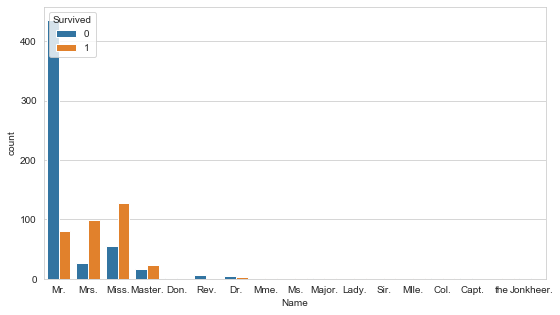

In [66]:
#traindf.head()
#traindf[traindf['Survived']==1].groupby(by='Name').count()

plt.figure(figsize=(9,5))
sns.countplot(x='Name',hue='Survived',data=traindf)

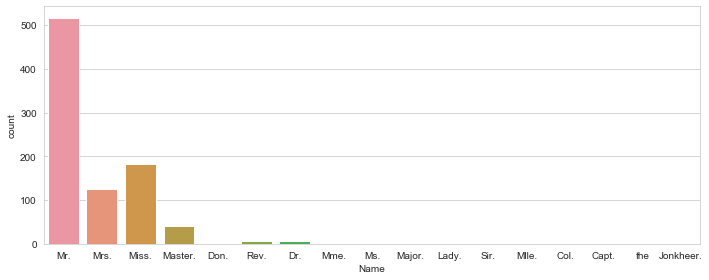

In [67]:
plt.figure(figsize=(10,4))
sns.countplot(x='Name', data=traindf)
plt.tight_layout()

In [68]:
def ReplaceTitle(title):
    MrTitle = ['Mr.']
    MissTitle = ['Miss.']
    MrsTitle = ['Mrs.']
    MasterTitle = ['Master.']
    
    if(title[0] in MrTitle):
        return 'mr'
    elif (title[0] in MissTitle):
        return 'miss'
    elif (title[0] in MrsTitle):
        return 'mrs'
    elif (title[0] in MasterTitle):
        return 'master'
    else:
        return 'others'

In [69]:
traindf['Name'] = traindf[['Name']].apply(ReplaceTitle, axis=1)
traindf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,CabinClass,Relatives,FarePerPass
0,1,0,3,mr,male,22.0,1,0,A/5 21171,7.2500,1,S,0,1,3.62500
1,2,1,1,mrs,female,38.0,1,0,PC 17599,71.2833,1,C,3,1,35.64165
2,3,1,3,miss,female,26.0,0,0,STON/O2. 3101282,7.9250,1,S,0,0,7.92500
3,4,1,1,mrs,female,35.0,1,0,113803,53.1000,1,S,3,1,26.55000
4,5,0,3,mr,male,35.0,0,0,373450,8.0500,1,S,0,0,8.05000


In [70]:
traindf['Name'].value_counts()

mr        517
miss      182
mrs       125
master     40
others     27
Name: Name, dtype: int64

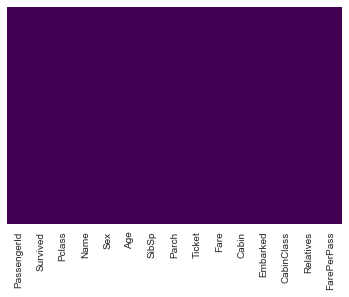

In [71]:
sns.heatmap(traindf.isnull(), yticklabels=False, cbar=False, cmap='viridis')

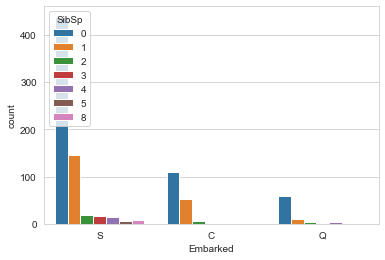

In [72]:
traindf[traindf['Embarked'].isnull()] #2 miss female with 0 SibSp, 0 Parch, have cabin, Pclass=1,Fare=80 have blank embarked
#sns.scatterplot(x='Embarked',y='Fare',data=traindf, hue='Sex')
sns.countplot(x='Embarked',data=traindf, hue='SibSp')

In [73]:
def fillEmbarked(cols):
    embarked = cols[0]
    
    #np.isnan can be applied to NumPy arrays of native dtype (such as np.float64) 
    #but raises TypeError when applied to object arrays
    if (pd.isnull(embarked)):
        return 'S'
    else:
        return embarked

In [74]:
traindf['Embarked'] = traindf[['Embarked']].apply(fillEmbarked,axis=1) #fill Embarked

In [75]:
traindf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,CabinClass,Relatives,FarePerPass
0,1,0,3,mr,male,22.0,1,0,A/5 21171,7.2500,1,S,0,1,3.62500
1,2,1,1,mrs,female,38.0,1,0,PC 17599,71.2833,1,C,3,1,35.64165
2,3,1,3,miss,female,26.0,0,0,STON/O2. 3101282,7.9250,1,S,0,0,7.92500
3,4,1,1,mrs,female,35.0,1,0,113803,53.1000,1,S,3,1,26.55000
4,5,0,3,mr,male,35.0,0,0,373450,8.0500,1,S,0,0,8.05000


In [76]:
#traindf['Ticket'].value_counts()
#traindf[traindf['Ticket']=='347082'] #this is a ticket no alloted to family of 7 and nobody survived
#traindf[traindf['Ticket']=='CA. 2343'] #this is a ticket no alloted to family of 7 and nobody survived
#traindf[traindf['Ticket']=='1601']
#traindf[traindf['Ticket']=='PC 17757']
#sns.scatterplot(x='Ticket',y='Survived',data=traindf,hue='Parch')

In [77]:
def fillTicket(cols):
    t = cols[0]
    
    #np.isnan can be applied to NumPy arrays of native dtype (such as np.float64) 
    #but raises TypeError when applied to object arrays
    if (t.isdigit()):
        return 1
    else:
        return 0

In [78]:
traindf['Ticket'] = traindf[['Ticket']].apply(fillTicket,axis=1) 

In [79]:
traindf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,CabinClass,Relatives,FarePerPass
0,1,0,3,mr,male,22.0,1,0,0,7.2500,1,S,0,1,3.62500
1,2,1,1,mrs,female,38.0,1,0,0,71.2833,1,C,3,1,35.64165
2,3,1,3,miss,female,26.0,0,0,0,7.9250,1,S,0,0,7.92500
3,4,1,1,mrs,female,35.0,1,0,1,53.1000,1,S,3,1,26.55000
4,5,0,3,mr,male,35.0,0,0,1,8.0500,1,S,0,0,8.05000


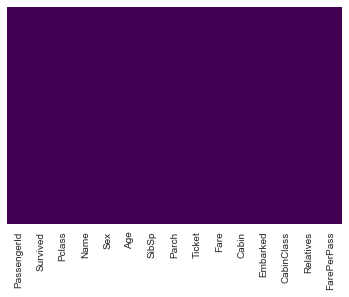

In [80]:
sns.heatmap(traindf.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [81]:
#Python ML library sklearn can accept only numerical features as input 
#therefore we have to convert categorical variables (sex/Pclass etc) to numerical variables using dummy method

name = pd.get_dummies(traindf['Name'], drop_first=True)
sex = pd.get_dummies(traindf['Sex'], drop_first=True)
embarked = pd.get_dummies(traindf['Embarked'], drop_first=True)

In [82]:
traindf = pd.concat([traindf,name,sex,embarked],axis=1)

In [83]:
traindf.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,CabinClass,Relatives,FarePerPass,miss,mr,mrs,others,male,Q,S
0,1,0,3,mr,male,22.0,1,0,0,7.2500,...,0,1,3.62500,0,1,0,0,1,0,1
1,2,1,1,mrs,female,38.0,1,0,0,71.2833,...,3,1,35.64165,0,0,1,0,0,0,0
2,3,1,3,miss,female,26.0,0,0,0,7.9250,...,0,0,7.92500,1,0,0,0,0,0,1


In [84]:
traindf.drop(['PassengerId','Name','Sex','Embarked'],axis=1,inplace=True)

In [85]:
traindf.head(3)

,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,CabinClass,Relatives,FarePerPass,miss,mr,mrs,others,male,Q,S
0,0,3,22.0,1,0,0,7.2500,1,0,1,3.62500,0,1,0,0,1,0,1
1,1,1,38.0,1,0,0,71.2833,1,3,1,35.64165,0,0,1,0,0,0,0
2,1,3,26.0,0,0,0,7.9250,1,0,0,7.92500,1,0,0,0,0,0,1


In [86]:
#fill Fare if missing - we have missing fare in test data set
traindf.corr()['Fare'].sort_values(ascending=True)

Pclass        -0.549500
Cabin         -0.339361
mr            -0.183766
male          -0.182333
Ticket        -0.173170
S             -0.162184
Q             -0.117216
others         0.024585
mrs            0.105203
Age            0.111094
miss           0.118271
SibSp          0.159651
Parch          0.216225
Relatives      0.217138
Survived       0.257307
CabinClass     0.337525
FarePerPass    0.840995
Fare           1.000000
Name: Fare, dtype: float64

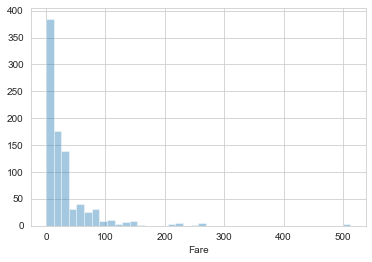

In [87]:
sns.distplot(traindf['Fare'],kde=False,bins=40)

In [88]:
plt.figure(figsize=(9,5))

#sns.scatterplot(x='Age',y='Fare',data=traindf,hue='Parch',palette='coolwarm')
#traindf.groupby('Parch').mean()['Fare']

#sns.scatterplot(x='Age',y='Fare',data=traindf,hue='SibSp',palette='coolwarm')
#traindf.groupby('SibSp').mean()['Fare']

#traindf.groupby(['Parch','SibSp']).mean()[['Fare']]

<Figure size 648x360 with 0 Axes>

<Figure size 648x360 with 0 Axes>

In [89]:
#traindf['relatives'] = traindf['SibSp'] + traindf['Parch']

In [90]:
traindf.loc[traindf['Relatives'] > 0, 'IsAlone'] = 0
traindf.loc[traindf['Relatives'] == 0, 'IsAlone'] = 1

In [91]:
traindf.head()

,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,CabinClass,Relatives,FarePerPass,miss,mr,mrs,others,male,Q,S,IsAlone
0,0,3,22.0,1,0,0,7.2500,1,0,1,3.62500,0,1,0,0,1,0,1,0.0
1,1,1,38.0,1,0,0,71.2833,1,3,1,35.64165,0,0,1,0,0,0,0,0.0
2,1,3,26.0,0,0,0,7.9250,1,0,0,7.92500,1,0,0,0,0,0,1,1.0
3,1,1,35.0,1,0,1,53.1000,1,3,1,26.55000,0,0,1,0,0,0,1,0.0
4,0,3,35.0,0,0,1,8.0500,1,0,0,8.05000,0,1,0,0,1,0,1,1.0


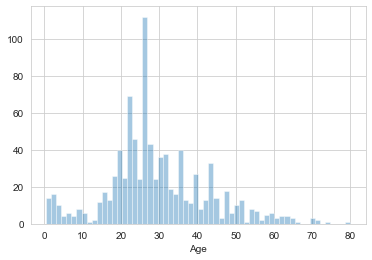

In [92]:
#pd.qcut(traindf['Age'],8)
#dataset['Age'] = dataset['Age'].astype(int)

sns.distplot(traindf['Age'],kde=False,bins=60)

In [93]:
def fillAgeClass(cols):
    age = cols[0]
    if(age<=11):
        return 0
    elif(age<=18):
        return 1
    elif(age<=22):
        return 2
    elif(age<=27):
        return 3
    elif (age<=33):
        return 4
    elif (age<=40):
        return 5
    elif (age<=66):
        return 6
    else:
        return 7

In [94]:
traindf['AgeClass'] = traindf[['Age']].apply(fillAgeClass,axis=1) 

In [95]:
def fillFareClass(cols):
    fare = cols[0]
    
    if(fare<=7.91):
        return 0
    elif(fare<=14.45):
        return 1
    elif(fare<=31):
        return 2
    elif(fare<=99):
        return 3
    elif (fare<=24.48):
        return 4
    elif (fare<=250):
        return 5
    else:
        return 6

In [96]:
traindf['FareClass'] = traindf[['Fare']].apply(fillFareClass,axis=1) 

In [97]:
traindf.head()

,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,CabinClass,Relatives,...,miss,mr,mrs,others,male,Q,S,IsAlone,AgeClass,FareClass
0,0,3,22.0,1,0,0,7.2500,1,0,1,...,0,1,0,0,1,0,1,0.0,2,0
1,1,1,38.0,1,0,0,71.2833,1,3,1,...,0,0,1,0,0,0,0,0.0,5,3
2,1,3,26.0,0,0,0,7.9250,1,0,0,...,1,0,0,0,0,0,1,1.0,3,1
3,1,1,35.0,1,0,1,53.1000,1,3,1,...,0,0,1,0,0,0,1,0.0,5,3
4,0,3,35.0,0,0,1,8.0500,1,0,0,...,0,1,0,0,1,0,1,1.0,5,1


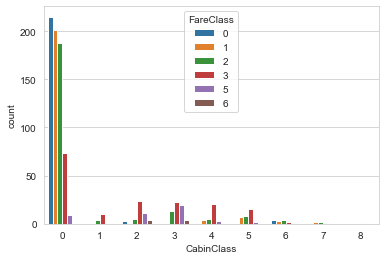

In [98]:
sns.countplot(x='CabinClass', data=traindf,hue='FareClass')

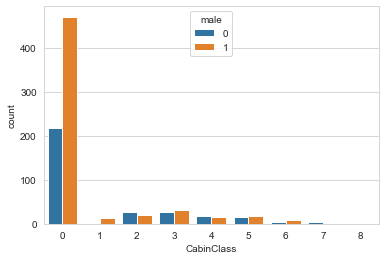

In [99]:
sns.countplot(x='CabinClass', data=traindf,hue='male')

In [100]:
traindf.head()

,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,CabinClass,Relatives,...,miss,mr,mrs,others,male,Q,S,IsAlone,AgeClass,FareClass
0,0,3,22.0,1,0,0,7.2500,1,0,1,...,0,1,0,0,1,0,1,0.0,2,0
1,1,1,38.0,1,0,0,71.2833,1,3,1,...,0,0,1,0,0,0,0,0.0,5,3
2,1,3,26.0,0,0,0,7.9250,1,0,0,...,1,0,0,0,0,0,1,1.0,3,1
3,1,1,35.0,1,0,1,53.1000,1,3,1,...,0,0,1,0,0,0,1,0.0,5,3
4,0,3,35.0,0,0,1,8.0500,1,0,0,...,0,1,0,0,1,0,1,1.0,5,1


In [101]:
#pd.qcut(traindf['Fare'],8)
#[(-0.001, 7.75] < (7.75, 7.91] < (7.91, 9.841] < (9.841, 14.454] < (14.454, 24.479] < (24.479, 31.0] 
#< (31.0, 69.488] < (69.488, 512.329]]

In [102]:
#import ml libraries now to check above default result
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [103]:
X = traindf.drop(['Survived'],axis=1)
Y = traindf['Survived']

In [104]:
xtrain, xtest, ytrain, ytest = train_test_split(X,Y,test_size=0.3)

In [105]:
# fit scaler on training data
norm = MinMaxScaler().fit(xtrain)
#norm = StandardScaler().fit(xtrain)

# transform training data
xtrainnorm = norm.transform(xtrain)

# transform testing dataabs
xtestnorm = norm.transform(xtest)

In [106]:
xtrainnorm.size

12460

In [107]:
logmodel = LogisticRegression(solver='liblinear')

In [108]:
logmodel.fit(xtrainnorm,ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [109]:
predictionsnorm = logmodel.predict(xtestnorm)

In [110]:
print(classification_report(predictionsnorm, ytest))

              precision    recall  f1-score   support

           0       0.89      0.82      0.85       172
           1       0.72      0.82      0.77        96

    accuracy                           0.82       268
   macro avg       0.81      0.82      0.81       268
weighted avg       0.83      0.82      0.82       268



In [111]:
logmodel.fit(xtrain,ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [112]:
predictions = logmodel.predict(xtest)

In [113]:
print(classification_report(predictions, ytest))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86       170
           1       0.74      0.83      0.78        98

    accuracy                           0.83       268
   macro avg       0.81      0.83      0.82       268
weighted avg       0.84      0.83      0.83       268



In [114]:
confusion_matrix(predictions, ytest)
#TP=69, TN=146, FP=31, FN=21
#total wrong prediction = 31+21=52 out of 267
#accuracy = (69+146)/267=81%
#F1-score=0.85/0.73

array([[141,  29],
       [ 17,  81]], dtype=int64)

In [115]:
round(accuracy_score(predictions,ytest)*100,2)

82.84

In [116]:
modelAccuracy = {}
modelAccuracy['LogisticRegression'] = round(accuracy_score(predictions,ytest)*100,2)

In [117]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
rfc.fit(xtrain,ytrain)
rfc_prediction = rfc.predict(xtest)
print(confusion_matrix(ytest,rfc_prediction))
print(classification_report(ytest,rfc_prediction), round(accuracy_score(rfc_prediction,ytest)*100,2))

[[145  13]
 [ 29  81]]
              precision    recall  f1-score   support

           0       0.83      0.92      0.87       158
           1       0.86      0.74      0.79       110

    accuracy                           0.84       268
   macro avg       0.85      0.83      0.83       268
weighted avg       0.84      0.84      0.84       268
 84.33


In [118]:
rfc = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
rfc.fit(xtrainnorm,ytrain)
rfc_prediction = rfc.predict(xtestnorm)
print(confusion_matrix(ytest,rfc_prediction))
print(classification_report(ytest,rfc_prediction), round(accuracy_score(rfc_prediction,ytest)*100,2))

[[145  13]
 [ 29  81]]
              precision    recall  f1-score   support

           0       0.83      0.92      0.87       158
           1       0.86      0.74      0.79       110

    accuracy                           0.84       268
   macro avg       0.85      0.83      0.83       268
weighted avg       0.84      0.84      0.84       268
 84.33


In [119]:
modelAccuracy['RandomForest'] = round(accuracy_score(rfc_prediction,ytest)*100,2)
modelAccuracy

{'LogisticRegression': 82.84, 'RandomForest': 84.33}

In [120]:
#coeff_df = pd.DataFrame(np.transpose(logmodel.coef_),X.columns,columns=['Coefficient'])
#coeff_df
#np.transpose(logmodel.coef_).shape #1*13
#X.columns. #13*1

In [121]:
#xtest.columns

In [122]:
#ytest.size

In [123]:
#sum(predictions==ytest)

In [124]:
#Import test data now

In [125]:
testdf = pd.read_csv('titanic_test.csv')

In [126]:
testdf.head(3) #note survived column is not here

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


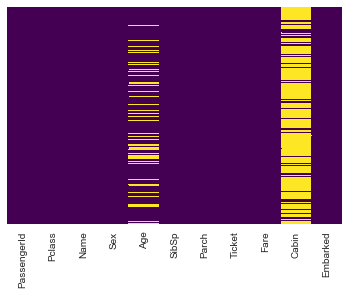

In [127]:
sns.heatmap(testdf.isnull(), cbar=False, yticklabels=False, cmap='viridis')

In [128]:
testdf.groupby('Pclass').mean()

,PassengerId,Age,SibSp,Parch,Fare
Pclass,,,,,
1,1098.224299,40.918367,0.476636,0.383178,94.280297
2,1117.935484,28.777500,0.376344,0.344086,22.202104
3,1094.178899,24.027945,0.463303,0.417431,12.459678


In [129]:
#traindf['Age'] = traindf[['Age','Pclass','Fare','Sex']].apply(fillAge,axis=1) #fill age
testdf['Age'] = testdf[['Age','Pclass','Fare','Sex']].apply(fillAge,axis=1)

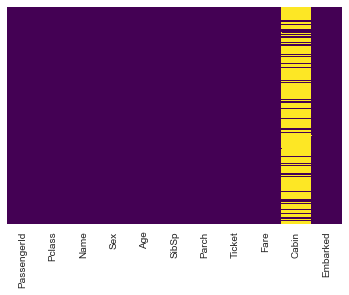

In [130]:
sns.heatmap(testdf.isnull(), cbar=False, yticklabels=False, cmap='viridis')

In [131]:
#testdf['CabinClass']= testdf[testdf['Cabin'].notnull()]['Cabin'].apply(lambda c: c[0])
#testdf['CabinClass'] = testdf['CabinClass'].fillna('U')

In [132]:
#testdf['Cabin'] = testdf[['Cabin','Fare']].apply(fillCabin, axis=1)
testdf.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [133]:
testdf['Name'] = testdf[['Name']].apply(fillNameTitle, axis=1)
testdf['Name'] = testdf[['Name']].apply(ReplaceTitle, axis=1)
testdf.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,mr,male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,mrs,female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,mr,male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,mr,male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,mrs,female,22.0,1,1,3101298,12.2875,NaN,S


In [134]:
testdf[testdf.sort_values(by='Fare')['Fare'].isnull()]

C:\Users\sanrajpu\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,mr,male,60.5,0,0,3701,NaN,NaN,S


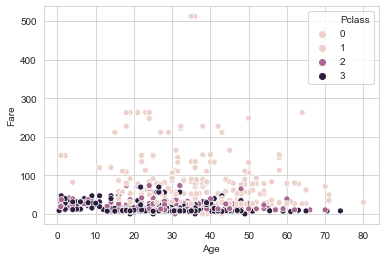

In [135]:
sns.scatterplot(x='Age',y='Fare',data=traindf,hue='Pclass')

In [136]:
testdf['Fare'] = testdf['Fare'].fillna(24.44)

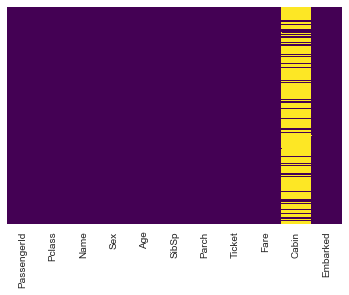

In [137]:
sns.heatmap(testdf.isnull(), cbar=False, yticklabels=False, cmap='viridis')

In [138]:
#testdf.isnull().values.any() : True if any null
#testdf[testdf['Embarked'].isnull()]
#testdf['Embarked'] = testdf[['Embarked']].apply(fillEmbarked,axis=1) #fill Embarked

In [139]:
testdf['Ticket'] = testdf[['Ticket']].apply(fillTicket,axis=1) #fill ticket

In [140]:

testdf['CabinClass']=testdf[testdf['Cabin'].notnull()]['Cabin'].apply(lambda c: c[0])
testdf['CabinClass'] = testdf['CabinClass'].fillna('U')
#testdf['CabinClass'] = testdf[['CabinClass','Pclass','Fare']].apply(fillCabinClass,axis=1)
testdf['CabinClass'] = testdf[['CabinClass']].apply(mapCabinClass,axis=1) #fill age

testdf['Relatives'] = testdf['SibSp'] + testdf['Parch']

testdf['FarePerPass'] = testdf[['Fare','Relatives']].apply(fillFarePerPass,axis=1) 

testdf['Cabin'] = testdf[['Cabin','Fare']].apply(fillCabin, axis=1)


In [141]:
#Python ML library sklearn can accept only numerical features as input 
#therefore we have to convert categorical variables (sex/Pclass etc) to numerical variables using dummy method

name = pd.get_dummies(testdf['Name'], drop_first=True)
sex = pd.get_dummies(testdf['Sex'], drop_first=True)
embarked = pd.get_dummies(testdf['Embarked'], drop_first=True)

testdf = pd.concat([testdf,name,sex,embarked],axis=1)

In [142]:

testdf.loc[testdf['Relatives'] > 0, 'IsAlone'] = 0
testdf.loc[testdf['Relatives'] == 0, 'IsAlone'] = 1


In [143]:
testdf['AgeClass'] = testdf[['Age']].apply(fillAgeClass,axis=1) 
testdf['FareClass'] = testdf[['Fare']].apply(fillFareClass,axis=1) 


In [144]:
testdfOriginal = testdf.copy()
testdfOriginal.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,miss,mr,mrs,others,male,Q,S,IsAlone,AgeClass,FareClass
0,892,3,mr,male,34.5,0,0,1,7.8292,1,...,0,1,0,0,1,1,0,1.0,5,0
1,893,3,mrs,female,47.0,1,0,1,7.0000,1,...,0,0,1,0,0,0,1,0.0,6,0
2,894,2,mr,male,62.0,0,0,1,9.6875,1,...,0,1,0,0,1,1,0,1.0,6,1


In [145]:
testdf.drop(['PassengerId','Name','Sex','Embarked'],axis=1,inplace=True)
testdfOriginal.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,miss,mr,mrs,others,male,Q,S,IsAlone,AgeClass,FareClass
0,892,3,mr,male,34.5,0,0,1,7.8292,1,...,0,1,0,0,1,1,0,1.0,5,0
1,893,3,mrs,female,47.0,1,0,1,7.0000,1,...,0,0,1,0,0,0,1,0.0,6,0
2,894,2,mr,male,62.0,0,0,1,9.6875,1,...,0,1,0,0,1,1,0,1.0,6,1


In [146]:
#testdf['AgeClass'] = testdf[['Age']].apply(fillAgeClass,axis=1) 
#testdf['FareClass'] = testdf[['Fare']].apply(fillFareClass,axis=1) 

In [147]:
testdf.head()

,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,CabinClass,Relatives,FarePerPass,miss,mr,mrs,others,male,Q,S,IsAlone,AgeClass,FareClass
0,3,34.5,0,0,1,7.8292,1,0,0,7.829200,0,1,0,0,1,1,0,1.0,5,0
1,3,47.0,1,0,1,7.0000,1,0,1,3.500000,0,0,1,0,0,0,1,0.0,6,0
2,2,62.0,0,0,1,9.6875,1,0,0,9.687500,0,1,0,0,1,1,0,1.0,6,1
3,3,27.0,0,0,1,8.6625,1,0,0,8.662500,0,1,0,0,1,0,1,1.0,3,1
4,3,22.0,1,1,1,12.2875,1,0,2,4.095833,0,0,1,0,0,0,1,0.0,2,1


In [148]:
xtrain.head()

,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,CabinClass,Relatives,FarePerPass,miss,mr,mrs,others,male,Q,S,IsAlone,AgeClass,FareClass
70,2,32.00,0,0,0,10.5000,1,0,0,10.5000,0,1,0,0,1,0,1,1.0,4,1
839,1,43.03,0,0,1,29.7000,1,3,0,29.7000,0,1,0,0,1,0,0,1.0,6,2
583,1,36.00,0,0,1,40.1250,1,1,0,40.1250,0,1,0,0,1,0,0,1.0,5,3
207,3,26.00,0,0,1,18.7875,1,0,0,18.7875,0,1,0,0,1,0,0,1.0,3,2
368,3,21.75,0,0,1,7.7500,1,0,0,7.7500,1,0,0,0,0,1,0,1.0,2,0


In [149]:
testdf[testdf['Fare'].isnull()]

,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,CabinClass,Relatives,FarePerPass,miss,mr,mrs,others,male,Q,S,IsAlone,AgeClass,FareClass


In [150]:
#testpredictions = logmodel.predict(testdf) #Input contains NaN, infinity or a value too large for dtype('float64')

In [151]:
#sns.distplot(testdf['Fare'],kde=False,bins=40)

In [152]:
#xtrain.head(2)
#len(xtrain.columns)
xtrain.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin',
       'CabinClass', 'Relatives', 'FarePerPass', 'miss', 'mr', 'mrs', 'others',
       'male', 'Q', 'S', 'IsAlone', 'AgeClass', 'FareClass'],
      dtype='object')

In [153]:
#len(testdf.columns)
testdf.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin',
       'CabinClass', 'Relatives', 'FarePerPass', 'miss', 'mr', 'mrs', 'others',
       'male', 'Q', 'S', 'IsAlone', 'AgeClass', 'FareClass'],
      dtype='object')

In [154]:
testdf[testdf.sort_values(by='Fare')['Fare'].isnull()]

C:\Users\sanrajpu\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,CabinClass,Relatives,FarePerPass,miss,mr,mrs,others,male,Q,S,IsAlone,AgeClass,FareClass


In [155]:
#sns.heatmap(testdf.isnull(),cbar=False,yticklabels=False,cmap='viridis')

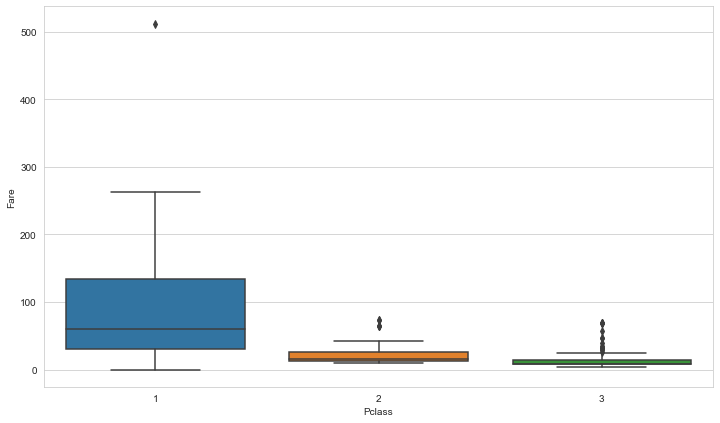

In [156]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Fare',data=testdf)

In [157]:
testdf.groupby('Pclass').mean()

,Age,SibSp,Parch,Ticket,Fare,Cabin,CabinClass,Relatives,FarePerPass,miss,mr,mrs,others,male,Q,S,IsAlone,AgeClass,FareClass
Pclass,,,,,,,,,,,,,,,,,,,
1,40.971121,0.476636,0.383178,0.672897,94.280297,0.962617,2.214953,0.859813,56.672489,0.130841,0.485981,0.327103,0.037383,0.532710,0.009346,0.467290,0.476636,4.934579,3.355140
2,28.861290,0.376344,0.344086,0.612903,22.202104,1.000000,0.408602,0.720430,14.644335,0.172043,0.634409,0.150538,0.021505,0.677419,0.043011,0.838710,0.580645,3.440860,1.731183
3,24.367339,0.463303,0.417431,0.766055,12.514633,1.000000,0.114679,0.880734,7.756403,0.220183,0.591743,0.105505,0.004587,0.669725,0.188073,0.651376,0.678899,2.715596,0.793578


In [158]:
def fillFare2(cols):
    
    pclass = cols[0]
    fare = cols[1]
    
    if np.isnan(fare):
        if pclass == 1:
            return 94.280297
        elif pclass==2:
            return 22.202104
        else:
            return 12.459678
    else:
        return fare

In [159]:
#testdf['Fare'] = testdf[['Pclass','Fare']].apply(fillFare,axis=1)

In [160]:
testdf[testdf['Fare'].isnull()] #now nothing is null

,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,CabinClass,Relatives,FarePerPass,miss,mr,mrs,others,male,Q,S,IsAlone,AgeClass,FareClass


In [161]:
testdf.head(2) #now nothing is null

,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,CabinClass,Relatives,FarePerPass,miss,mr,mrs,others,male,Q,S,IsAlone,AgeClass,FareClass
0,3,34.5,0,0,1,7.8292,1,0,0,7.8292,0,1,0,0,1,1,0,1.0,5,0
1,3,47.0,1,0,1,7.0000,1,0,1,3.5000,0,0,1,0,0,0,1,0.0,6,0


In [162]:
#testdf[testdf.isnull()]
testdf.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin',
       'CabinClass', 'Relatives', 'FarePerPass', 'miss', 'mr', 'mrs', 'others',
       'male', 'Q', 'S', 'IsAlone', 'AgeClass', 'FareClass'],
      dtype='object')

In [163]:
testpredictions = logmodel.predict(testdf) #Input contains NaN, infinity or a value too large for dtype('float64')

In [164]:
type(testpredictions)

numpy.ndarray

In [165]:
testpredictions.size

418

In [166]:
#testdf['SurvivedPrediction'] = pd.concat([testdf,pd.Series(testpredictions)],axis=1)
survivedseries = pd.Series(testpredictions)

In [167]:
#testdf['SurvivedPrediction'] = pd.concat([testdf,survivedseries],axis=1)
testdf['Survived'] = testpredictions.tolist()

In [168]:
testdf.head(3)

,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,CabinClass,Relatives,FarePerPass,...,mr,mrs,others,male,Q,S,IsAlone,AgeClass,FareClass,Survived
0,3,34.5,0,0,1,7.8292,1,0,0,7.8292,...,1,0,0,1,1,0,1.0,5,0,0
1,3,47.0,1,0,1,7.0000,1,0,1,3.5000,...,0,1,0,0,0,1,0.0,6,0,0
2,2,62.0,0,0,1,9.6875,1,0,0,9.6875,...,1,0,0,1,1,0,1.0,6,1,0


In [169]:
testdfOriginal.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,miss,mr,mrs,others,male,Q,S,IsAlone,AgeClass,FareClass
0,892,3,mr,male,34.5,0,0,1,7.8292,1,...,0,1,0,0,1,1,0,1.0,5,0
1,893,3,mrs,female,47.0,1,0,1,7.0000,1,...,0,0,1,0,0,0,1,0.0,6,0
2,894,2,mr,male,62.0,0,0,1,9.6875,1,...,0,1,0,0,1,1,0,1.0,6,1
3,895,3,mr,male,27.0,0,0,1,8.6625,1,...,0,1,0,0,1,0,1,1.0,3,1
4,896,3,mrs,female,22.0,1,1,1,12.2875,1,...,0,0,1,0,0,0,1,0.0,2,1


In [170]:
testdfOriginal['Survived'] = testpredictions.tolist()
testdfOriginal.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,mr,mrs,others,male,Q,S,IsAlone,AgeClass,FareClass,Survived
0,892,3,mr,male,34.5,0,0,1,7.8292,1,...,1,0,0,1,1,0,1.0,5,0,0
1,893,3,mrs,female,47.0,1,0,1,7.0000,1,...,0,1,0,0,0,1,0.0,6,0,0
2,894,2,mr,male,62.0,0,0,1,9.6875,1,...,1,0,0,1,1,0,1.0,6,1,0
3,895,3,mr,male,27.0,0,0,1,8.6625,1,...,1,0,0,1,0,1,1.0,3,1,0
4,896,3,mrs,female,22.0,1,1,1,12.2875,1,...,0,1,0,0,0,1,0.0,2,1,1


In [171]:
testdfOriginal[['PassengerId','Survived']].to_csv('newpredict0915_5.csv',index=False)

In [172]:
#RFC
rfc_test_prediction = rfc.predict(testdf.drop('Survived',axis=1))

testdfOriginal['Survived'] = rfc_test_prediction.tolist()
testdfOriginal[['PassengerId','Survived']].to_csv('rfcpredict0915_5.csv',index=False)


In [173]:
modelAccuracy

{'LogisticRegression': 82.84, 'RandomForest': 84.33}